DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a data clustering algorithm that works well for identifying clusters of arbitrary shapes in unlabeled data. Unlike K-means, which requires specifying the number of clusters beforehand, DBSCAN discovers clusters based on their density.<br><br>

Here's how DBSCAN works:<br>

Parameters: You define two parameters:<br>
Epsilon (ε): This is the maximum distance to consider a point as a neighbor.<br><br>
MinPts (MinPoints): This is the minimum number of neighbors a point needs to be considered a core point.<br><br>
Iterate over Points: The algorithm iterates through each data point:<br>
If the point is a core point, it creates a cluster and labels all its reachable neighbors (including border points) as belonging to the same cluster.<br>
If the point is not a core point and has no reachable core points, it's classified as noise.<br><br>
Stop When No New Clusters Found: The algorithm continues iterating until no new core points are found and assigned to clusters, indicating that all clusters have been discovered.

<br><br>

Density-based: DBSCAN defines clusters as areas with high density (many data points close together) separated by areas of low density. This allows it to find clusters of irregular shapes and sizes.<br><br>
No Predefined Clusters: DBSCAN doesn't require you to specify the number of clusters (K) like K-means. It automatically discovers clusters based on the data's inherent density.<br><br>
Core Points, Border Points, and Noise: DBSCAN classifies data points into three categories:<br><br>
Core Points: These are points with a minimum number of neighbors (MinPts) within a specified distance (Epsilon). They form the core of a cluster.<br>
Border Points: These are points reachable from core points but don't have enough neighbors themselves to be core points. They lie on the fringes of clusters.<br><br>
Noise: These are points that don't meet the criteria for core points or border points. They are considered outliers or unclustered data.


<ipython-input-10-667767ea280d>:48: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(colors[:-1], ['Core Points', 'Border Points'])  # Exclude noise color from legend


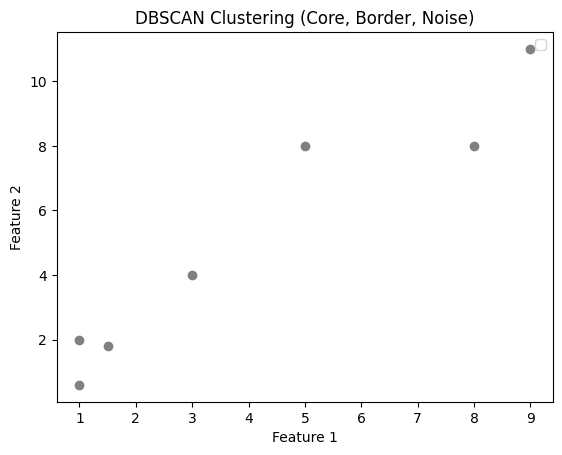

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np  # for circle visualization (optional)

# Sample data (replace with your actual data)
X = [[1, 2], [3, 4], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]]

# Define DBSCAN parameters
eps = 0.5  # Epsilon (maximum distance between points to be considered neighbors)
min_samples = 10  # Minimum number of neighbors to be a core point

# Create a DBSCAN model
db = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the model to the data
db.fit(X)

# Get cluster labels for each data point
cluster_labels = db.labels_

# Function to generate a circle for visualization (optional)
def generate_circle(center, radius):
  theta = np.linspace(0, 2*np.pi, 200)
  a = radius * np.cos( theta )
  b = radius * np.sin( theta )
  return a, b

# Visualization setup
colors = ['red', 'green', 'blue', 'gray']  # Define colors for clusters (core, border, noise)

# Plot data points with colors based on cluster labels
for i, point in enumerate(X):
  label = cluster_labels[i]
  color = colors[label + 1] if label != -1 else colors[-1]  # Noise gets separate color
  plt.scatter(point[0], point[1], c=color)

  # Optional: Plot a circle around a sample of core points (conceptual epsilon neighborhood)
  if label == 0:  # Considering only core points (label 0) for illustration
    circle_center = point
    circle_radius = eps  # Adjust radius based on your eps value
    circle_x, circle_y = generate_circle(circle_center, circle_radius)
    plt.plot(circle_x + circle_center[0], circle_y + circle_center[1], color='lightgray', linestyle='--')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering (Core, Border, Noise)')
plt.legend(colors[:-1], ['Core Points', 'Border Points'])  # Exclude noise color from legend
plt.show()
